In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [63]:
#statistical analysis on features:
df=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/ProsodyData/stat_pr/prosodyfeaturesst_seg_train_stat.csv')
#train and test data:
df_train=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/ProsodyData/prosodyfeaturesst_seg_dev.csv')
df_test=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/ProsodyData/prosodyfeaturesst_seg_test.csv')

In [64]:
req_features=df[(df['p_HC_DP']<0.05) | (abs(df['p_HC_DP.1'])>0.4)]
feature_list=req_features['Unnamed: 0'].tolist()

In [65]:
df_train.replace({'Group':{"HC":0,"DP":1}},inplace=True)

In [66]:
df_train=df_train.fillna(0)

In [67]:
df_train.isnull().sum().sum()

0

In [68]:
X_train=df_train[df_train.columns.intersection(feature_list)]

In [69]:
pca=PCA(n_components=4)

In [70]:
x_trainpca=pca.fit_transform(X_train)
pca_df=pd.DataFrame(x_trainpca,columns=["PCA1","PCA2","PCA3","PCA4"])

In [71]:
pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-183.069937,73.670957,-26.088172,107.507505
1,-259.707025,-124.858959,46.123802,16.262024
2,-272.142858,-121.656023,-13.482786,27.787140
3,-249.395317,25.844186,-40.299040,30.368096
4,-73.925384,-3.831926,-52.990855,-112.467453


In [72]:
Y_train=df_train['Group']

In [73]:
print(pca_df.shape)
print(Y_train.shape)

(5023, 4)
(5023,)


In [74]:
from sklearn.preprocessing import StandardScaler
std_Scaler=StandardScaler()
std_Scaler

StandardScaler()

In [75]:
X=std_Scaler.fit_transform(pca_df)

In [76]:
Y=Y_train

In [77]:
from sklearn.cluster import KMeans

In [78]:
km1 = KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, random_state=66, tol=0.0001, verbose=2)

y=km1.fit_predict(X)

Initialization complete
Iteration 0, inertia 20422.36197916021.
Iteration 1, inertia 16672.813392836295.
Iteration 2, inertia 16474.622738433252.
Iteration 3, inertia 16408.497288802304.
Iteration 4, inertia 16374.947038199845.
Iteration 5, inertia 16359.55860491741.
Iteration 6, inertia 16350.820670871528.
Iteration 7, inertia 16345.258327762229.
Iteration 8, inertia 16342.961774395268.
Iteration 9, inertia 16341.357342252199.
Iteration 10, inertia 16340.102575329602.
Iteration 11, inertia 16339.667784109752.
Converged at iteration 11: center shift 7.346460806276645e-05 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 21498.41846586882.
Iteration 1, inertia 16381.636091086115.
Iteration 2, inertia 16359.305129645869.
Iteration 3, inertia 16351.81451088196.
Iteration 4, inertia 16347.512938319574.
Iteration 5, inertia 16344.38075367704.
Iteration 6, inertia 16342.821327609685.
Iteration 7, inertia 16342.256885759803.
Converged at iteration 7: center 

In [79]:
len(y)

5023

In [80]:
df_train['clusters']=y

In [81]:
cluster=df_train[['subject','Group','clusters']]

In [82]:
cluster

,subject,Group,clusters
0,300_P_0.wav,0,1
1,300_P_1.wav,0,0
2,300_P_10.wav,0,0
3,300_P_11.wav,0,1
4,300_P_12.wav,0,0
...,...,...,...
5018,713_P_5.wav,0,1
5019,713_P_6.wav,0,0
5020,713_P_7.wav,0,1
5021,713_P_8.wav,0,1


In [83]:
from sklearn import metrics
metrics.accuracy_score(Y,y)

0.5134381843519809

In [84]:
from sklearn.metrics import classification_report
print(classification_report(Y,y))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64      3878
           1       0.19      0.35      0.25      1145

    accuracy                           0.51      5023
   macro avg       0.47      0.46      0.44      5023
weighted avg       0.62      0.51      0.55      5023



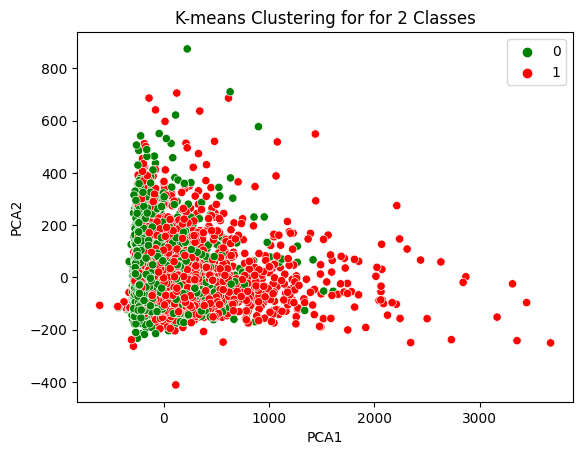

In [85]:
sns.scatterplot(x="PCA1",y="PCA2",hue=y,palette=['green','red'],data=pca_df)
plt.title("K-means Clustering for for 2 Classes")
plt.show()

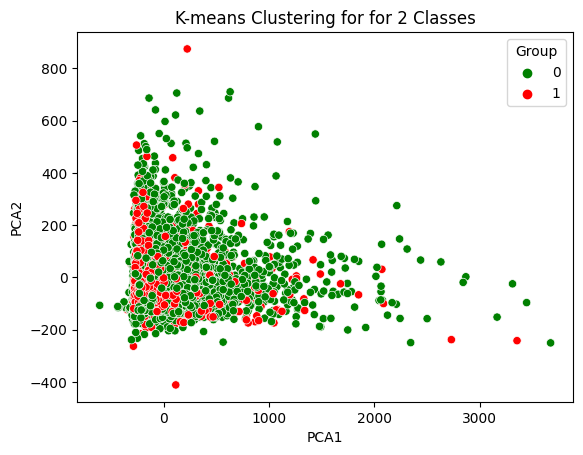

In [86]:
sns.scatterplot(x="PCA1",y="PCA2",hue=Y,palette=['green','red'],data=pca_df)
plt.title("K-means Clustering for for 2 Classes")
plt.show()

In [87]:
#cluster.to_csv('/home/vboxuser/VoiceFiles/kmeans.csv')

In [88]:
selection=cluster[cluster['Group']==cluster['clusters']]

In [89]:
selection.groupby(['Group'])['Group'].count()

Group
0    2180
1     399
Name: Group, dtype: int64

2180  correctly classified data points

In [90]:
selection

,subject,Group,clusters
1,300_P_1.wav,0,0
2,300_P_10.wav,0,0
4,300_P_12.wav,0,0
5,300_P_13.wav,0,0
9,300_P_17.wav,0,0
...,...,...,...
5009,713_P_4.wav,0,0
5010,713_P_40.wav,0,0
5016,713_P_46.wav,0,0
5019,713_P_6.wav,0,0


In [91]:
new_df=df_train[df_train.index.isin(selection.index)]

In [92]:
new_df.shape

(2579, 106)

In [93]:
new_df.groupby(['Group'])['Group'].count()

Group
0    2180
1     399
Name: Group, dtype: int64

In [94]:
X_train=new_df[new_df.columns.intersection(feature_list)]
Y_train=new_df['Group']

In [95]:
X_train.shape

(2579, 20)

In [96]:
Y_train.shape

(2579,)

In [97]:
! pip install imblearn --quiet

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

X_train_resampled, Y_train_resampled = sm.fit_resample(X_train,Y_train)
df_train_upsampled = pd.concat([pd.DataFrame(Y_train_resampled), pd.DataFrame(X_train_resampled)], axis=1)

from sklearn.utils import resample

df_1=new_df[new_df['Group']==1]
df_other=new_df[new_df['Group']!=1]
df_upsampled=resample(df_1,random_state=42,n_samples=2228,replace=True)
df_train_upsampled=pd.concat([df_upsampled,df_other])

In [98]:
df_train_upsampled.groupby(['Group'])['Group'].count()

Group
0    2180
1    2180
Name: Group, dtype: int64

In [99]:
df_train_upsampled

,Group,F0max,F0skew,F0kurt,F0tiltmax,F0tiltskw,lastF0skw,stdEunvoiced,kurtosisEunvoiced,avgtiltEunvoiced,...,kurtosistiltEunvoiced,avgmseEunvoiced,stdmseEunvoiced,kurtosislastEunvoiced,avgdurunvoiced,maxdurunvoiced,mindurunvoiced,UVU,VP,UP
0,0,146.793304,-0.113077,-0.996979,13.182021,-0.298006,0.693419,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,205.637115,2.033316,3.646668,-4.268436,-0.724887,-0.362247,1.802530,-0.534848,-6.132327,...,-2.000000,3.537560,2.085022,-0.142496,0.110000,0.140000,0.080000,0.189657,1.167707,0.273296
2,0,214.766144,1.277414,0.580108,188.020545,-0.035951,0.362130,2.136995,-1.156600,-21.273154,...,-0.146805,1.844393,1.520252,-1.500000,0.071663,0.100000,0.049977,0.178908,1.069515,0.233037
3,0,181.004791,1.564075,2.366360,64.425287,-0.308938,-0.085538,1.930065,0.319358,95.777751,...,-1.500000,2.306516,2.555852,-3.000000,0.062506,0.140000,0.020000,0.108906,2.130979,0.260440
4,0,212.089783,1.764558,2.003307,17.456528,-1.358917,0.352421,2.958026,0.040333,23.501687,...,-2.000000,7.249213,1.283350,1.422434,0.104989,0.109977,0.100000,0.175472,1.450980,0.308790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,1,267.353640,2.023349,4.890689,117.725817,-0.272927,-2.308182,3.361522,-0.920277,-4.510480,...,-0.986640,16.290897,18.458154,-0.934034,0.080842,0.110000,0.044489,0.265221,0.732702,0.244191
4356,1,268.395712,1.021097,2.071201,207.036711,-0.089490,0.466445,4.925504,-0.449681,113.262284,...,-1.204686,15.957953,5.696924,-1.294383,0.074480,0.140000,0.010023,0.207705,0.846594,0.221501
4357,1,246.039539,-1.613319,4.354294,428.939200,-1.260953,-0.700756,4.184073,-0.826370,91.489115,...,0.816889,13.275594,15.685188,0.758430,0.087514,0.140000,0.038762,0.292216,0.713231,0.286906
4358,1,233.286541,-0.218237,2.770056,57.381408,-0.487396,0.055405,2.835471,-0.812450,62.354103,...,-1.166623,4.136373,2.613343,-0.106354,0.066642,0.092137,0.033810,0.244381,0.486802,0.155765


In [100]:
X_train_resampled=df_train_upsampled.drop(['Group'],axis=1)
Y_train_resampled=df_train_upsampled['Group']

In [101]:
X_train_resampled.shape

(4360, 20)

In [102]:
import Normalization as n
X=n.normalize_train(X_train_resampled)

In [103]:
Y=Y_train_resampled

In [104]:
df_test=df_test.fillna(0)

In [105]:
#X_test=df_test[df_test.columns.intersection(feature_list)]
#df_test[df_test.index.isin(selection.index)]
df_test.replace({'Group':{"HC":0,"DP":1}},inplace=True)
#Y_test=df_test['Group']

In [106]:
import itertools
subject = df_test['subject']
# empty list
result = []

iterator = itertools.groupby(subject, lambda string: string.split('_')[0])

for element, group in iterator:
   
   result.append(list(group))

In [107]:
len(result)

56

In [108]:
from sklearn.svm import SVC

In [109]:
X_test=df_test[df_test.columns.intersection(feature_list)]
X_test=n.normalize_test(X_test)
Y_test=df_test['Group']

In [110]:
Y_test.shape

(4580,)

In [111]:
SVM_model = SVC(kernel='rbf',C=1,gamma=0.1, class_weight='balanced')
SVM_model.fit(X,Y)
Y_predict_SVM=SVM_model.predict(X_test)
acc= metrics.accuracy_score(Y_test,Y_predict_SVM)

In [112]:
acc

0.6246724890829695

In [113]:
param_grid= {'C':[0.1,1],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf']
            }

In [114]:
from sklearn.model_selection import GridSearchCV
grid1= GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)
grid1.fit(X,Y)
print(grid1.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   4.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   6.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time=   3.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   4.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   3.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=   3.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   1.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   1.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   2.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   1.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   2.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_predict_SVM))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3311
           1       0.35      0.42      0.38      1269

    accuracy                           0.62      4580
   macro avg       0.55      0.56      0.56      4580
weighted avg       0.65      0.62      0.63      4580



In [116]:
from statistics import mode

In [117]:
true_per=[] #true percentage
out_per=[] #predicted percentage
true_output=[]
pred_output=[]
true_count=[] #true count
count=[] #predicted count

for i in range (0,len(result)):
    test=df_test[df_test['subject'].isin(result[i])] 
    X_test=test[test.columns.intersection(feature_list)]
    X_test=n.normalize_test(X_test)
    Y_test=test['Group']

    Y_predict=SVM_model.predict(X_test)
    
    per_pred_dp=np.sum(Y_predict==1)/Y_predict.shape[0]*100
    count_pred_dp=np.sum(Y_predict==1)
    count.append(count_pred_dp)
    
    
    if per_pred_dp>50:
        y_=1
    else:
        y_=0
    
    y=mode(Y_test)
    per=np.sum(Y_test==1)/Y_test.shape[0]*100
    count_true_dp=np.sum(Y_test==1)
    true_count.append(count_true_dp)
    
    
    true_per.append(per)
    out_per.append(per_pred_dp)
    true_output.append(y)
    pred_output.append(y_)
    
print(classification_report(true_output,pred_output))
print(metrics.accuracy_score(true_output,pred_output))
    
print(confusion_matrix(true_output,pred_output))    

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        39
           1       0.44      0.47      0.46        17

    accuracy                           0.66        56
   macro avg       0.60      0.61      0.61        56
weighted avg       0.67      0.66      0.66        56

0.6607142857142857
[[29 10]
 [ 9  8]]


In [118]:
df_pred=pd.DataFrame({'percentage of depression':out_per,'label':pred_output,'true_label':true_output})

In [119]:
df_pred_hc=df_pred.loc[df_pred['true_label']==0]
df_pred_hc.sort_values(by=['percentage of depression'],ascending=False)

,percentage of depression,label,true_label
5,95.348837,1,0
17,92.857143,1,0
0,78.947368,1,0
4,75.000000,1,0
19,75.000000,1,0
26,71.428571,1,0
37,70.370370,1,0
9,68.468468,1,0
39,66.666667,1,0
18,52.000000,1,0


In [120]:
df_pred_hc.shape

(39, 3)

<AxesSubplot: xlabel='percentage of depression', ylabel='true_label'>

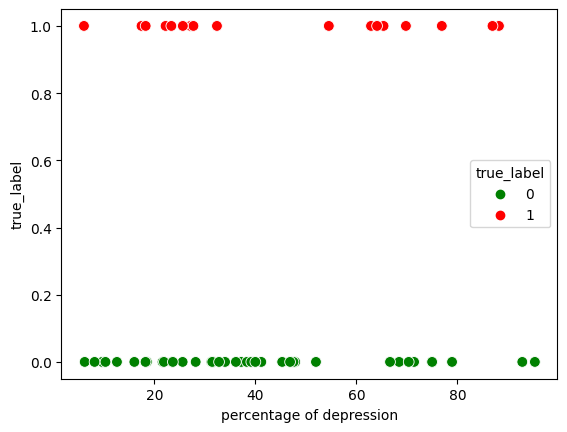

In [121]:
import seaborn as sns

sns.scatterplot(x='percentage of depression',y='true_label',data=df_pred,s=60,hue='true_label',palette=['green','red'])

-------------------- REFERENCE --------------------

In [122]:
len(result[24])

72

In [123]:
test=df_test[df_test['subject'].isin(result[24])] 
X_test=test[test.columns.intersection(feature_list)]
X_test=n.normalize_test(X_test)
Y_test=test['Group']
Y_predict_SVM=SVM_model.predict(X_test)

In [124]:
X_test.shape

(72, 20)

In [125]:
(Y_predict_SVM)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0])

In [126]:
np.array(Y_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])